# Dynamo-scvelo benchmark

Here you will learn the basics of RNA velocity analysis.

For illustration, it is applied to endocrine development in the pancreas, with lineage commitment to four major fates: α, β, δ and ε-cells. <br/> 
See [here](https://scvelo.readthedocs.io/scvelo.datasets.pancreas.html) for more details. It can be applied to your own data along the same lines. 

The notebook is also available at
[Google Colab](https://colab.research.google.com/github/theislab/scvelo_notebooks/blob/master/VelocityBasics.ipynb)
and [nbviewer](https://nbviewer.jupyter.org/github/theislab/scvelo_notebooks/blob/master/VelocityBasics.ipynb).

In [1]:
# update to the latest version, if not done yet.
!pip install scvelo --upgrade --quiet

In [2]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.8.12) on 2021-11-06 23:02.


In [3]:
import dynamo
import dynamo as dyn
from dynamo.preprocessing import Preprocessor
import pearson_residual_normalization_recipe
from benchmark_utils import *
dyn_adata = dyn.sample_data.zebrafish()
print("original data shape:", dyn_adata.shape)
dyn_adata


|-----> Downloading data to ./data/zebrafish.h5ad


original data shape: (4181, 16940)


AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch'
    layers: 'spliced', 'unspliced'

In [21]:
celltype_key = "Cell_type"

In [4]:

preprocessor = Preprocessor()
preprocessor.config_monocle_recipe(dyn_adata) # use monocle as default base config
preprocessor.config_seurat_recipe()
# preprocessor.preprocess_adata_seurat(dyn_adata)
dyn.preprocessing.utils.unique_var_obs_adata(dyn_adata)
scv.preprocessing.filter_genes(dyn_adata, min_shared_counts=20)
# scv.preprocessing.utils.normalize_per_cell(dyn_adata)

# scv.preprocessing.filter_genes_dispersion(dyn_adata, n_top_genes=2000, flavor="seurat")
# scv.pp.log1p(dyn_adata)
# preprocessor.filter_genes_by_outliers(dyn_adata)
# dyn_adata = dyn.preprocessing.preprocessor_utils.calc_sz_factor(
#     dyn_adata,
#     total_layers=dyn_adata.uns["pp"]["experiment_total_layers"],
#     scale_to=None,
#     splicing_total_layers=False,
#     X_total_layers=False,
#     layers=dyn_adata.uns["pp"]["experiment_layers"],
#     genes_use_for_norm=None,
# )
preprocessor.normalize_by_cells(dyn_adata, skip_log=True)
# preprocessor.log1p(dyn_adata)
preprocessor.select_genes(dyn_adata, recipe="seurat", n_top_genes=2000)
preprocessor.log1p(dyn_adata, layers=["X"])
preprocessor.pca(dyn_adata, pca_key="X_pca")

|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----> rounding mat data
|-----> rounding mat data
|-----> rounding mat data
|-----> size factor normalize following layers: ['X', 'unspliced', 'spliced']
|-----> skipping log transformation as input requires...
|-----> applying None to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> skipping log transformation as input requires...
|-----> applying None to layer<unspliced>
|-----> <insert> X_unspliced to obsm in AnnData Object.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> skipping log transformation as input requires...
|-----> applying None to layer<spliced>
|-----> <insert> X_spliced to obsm in AnnData Object.


Filtered out 11388 genes that are detected 20 counts (shared).


|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> filtering genes by dispersion...
|-----> select genes by recipe: seurat
|-----------> choose 2000 top genes
|-----> <insert> pp_gene_means to var in AnnData Object.
|-----> <insert> gene_vars to var in AnnData Object.
|-----> <insert> gene_highly_variable to var in AnnData Object.
|-----> number of selected highly variable genes: 2000
|-----> [filter genes by dispersion] in progress: 100.0000%
|-----> [filter genes by dispersion] finished [0.6990s]
|-----> log1p transform applied to layers: ['X']


AnnData object with n_obs × n_vars = 4181 × 5552
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size'
    var: 'pp_gene_means', 'gene_vars', 'gene_highly_variable', 'use_for_pca'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced'

In [5]:
# dyn_adata.layers['spliced']
dyn_adata.layers["spliced"]

<4181x5552 sparse matrix of type '<class 'numpy.int64'>'
	with 3129565 stored elements in Compressed Sparse Row format>

In [6]:
dyn_adata

AnnData object with n_obs × n_vars = 4181 × 5552
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size'
    var: 'pp_gene_means', 'gene_vars', 'gene_highly_variable', 'use_for_pca'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced'

In [7]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


### Load the Data

## Preprocess by scv.pp

In [8]:
adata = dynamo.sample_data.zebrafish()

|-----> Downloading data to ./data/zebrafish.h5ad


### Preprocess the Data by scelo

In [9]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000, flavor="seurat")
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)


Filtered out 11388 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
dyn_pca_genes = set(dyn_adata.var_names[dyn_adata.var["use_for_pca"]])
print(len(set(adata.var_names).intersection(dyn_pca_genes)))
print(len(set(adata.var_names).difference(dyn_pca_genes)))
print(len(set(dyn_pca_genes).difference(set(adata.var_names))))
print(len(dyn_pca_genes))
print(adata.n_vars)

1949
51
51
2000
2000


In [11]:
dyn_adata

AnnData object with n_obs × n_vars = 4181 × 5552
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'initial_cell_size'
    var: 'pp_gene_means', 'gene_vars', 'gene_highly_variable', 'use_for_pca'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced'

In [12]:
adata

AnnData object with n_obs × n_vars = 4181 × 2000
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [13]:
adata.obs["initial_size"].describe()

count     4181.000000
mean      2922.729736
std       2407.582764
min         68.000000
25%       1252.000000
50%       1984.000000
75%       3843.000000
max      15914.000000
Name: initial_size, dtype: float64

In [14]:
dyn_adata.obs["initial_size"].describe()

count     4181.000000
mean      2922.729736
std       2407.582764
min         68.000000
25%       1252.000000
50%       1984.000000
75%       3843.000000
max      15914.000000
Name: initial_size, dtype: float64

<AxesSubplot:>

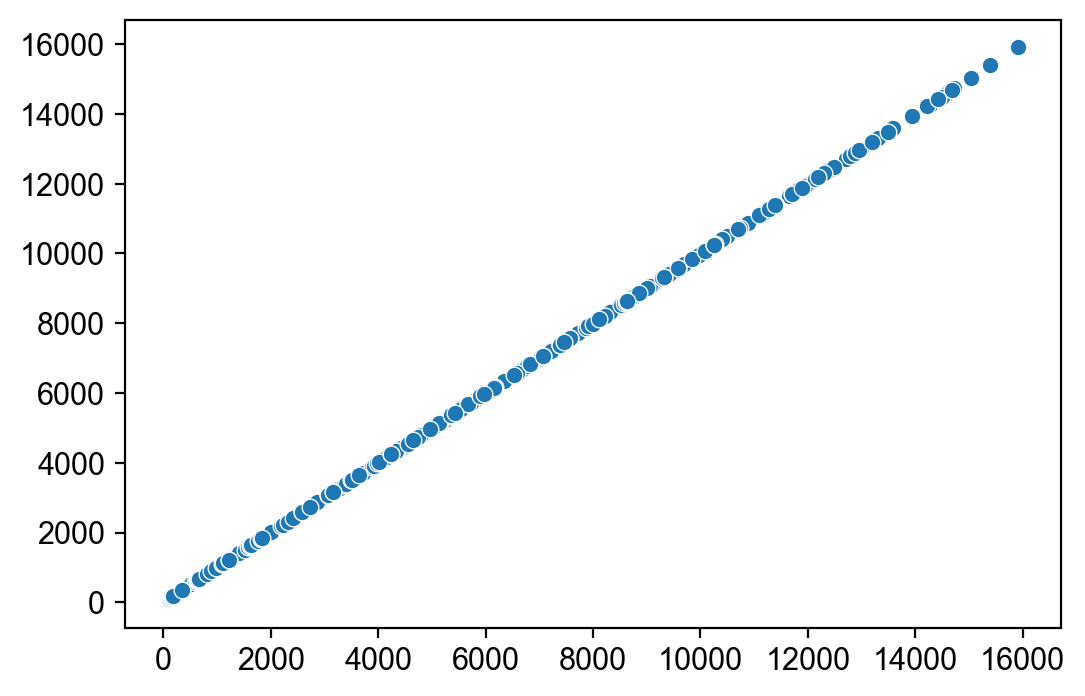

In [15]:
sns.scatterplot(adata.obs["initial_size"].to_numpy(), dyn_adata.obs["initial_size"].to_numpy())

<AxesSubplot:>

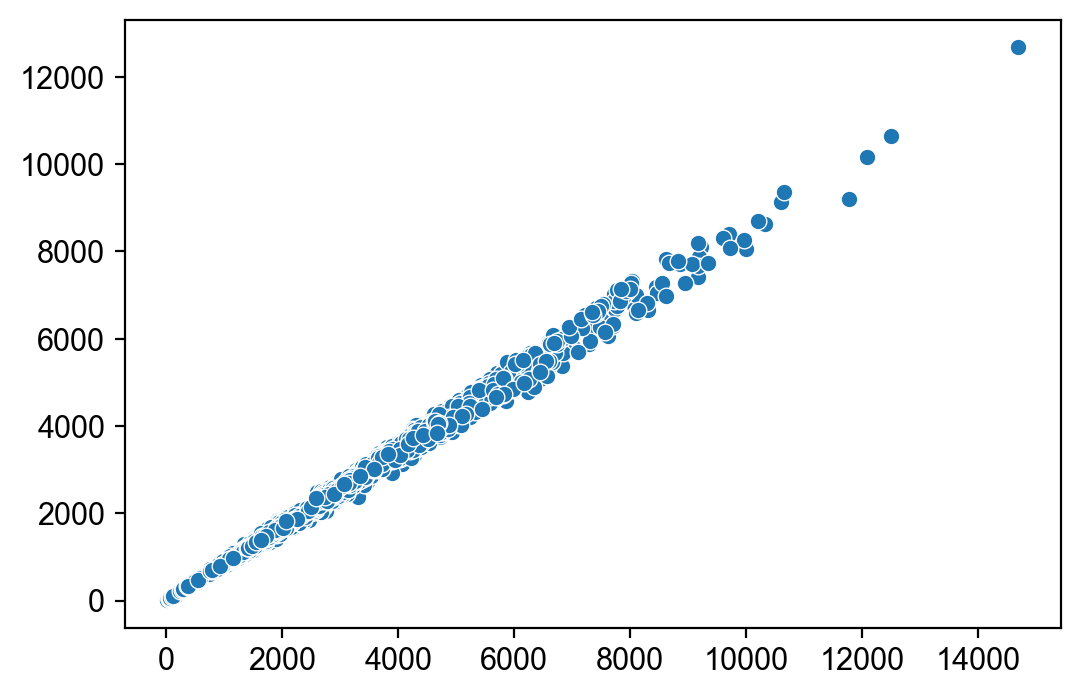

In [16]:
sns.scatterplot(adata.obs["initial_size_unspliced"].to_numpy(), dyn_adata.obs["initial_unspliced_cell_size"].to_numpy())

<AxesSubplot:>

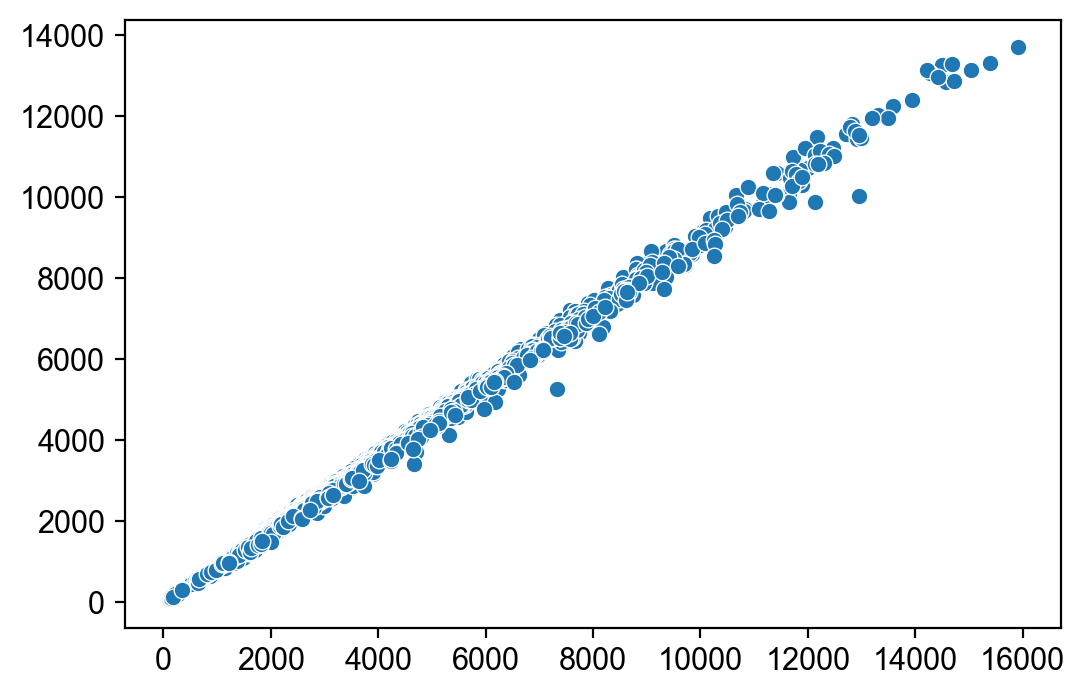

In [17]:
sns.scatterplot(adata.obs["initial_size_spliced"].to_numpy(), dyn_adata.obs["initial_spliced_cell_size"].to_numpy())

In [18]:
print(adata.obsm["X_pca"].shape)
print(dyn_adata.obsm["X_pca"].shape)

(4181, 30)
(4181, 30)


## Comparison of X_pca, spliced and unspliced data  
Note: scvelo does not log1p transform unspliced and spliced layers/

scvelo seurat X_pca stats:
count    1.254300e+05
mean    -2.070514e-07
std      1.605636e+00
min     -8.343900e+00
25%     -6.412283e-01
50%     -2.956188e-02
75%      5.880693e-01
max      1.131858e+01
dtype: float64
dynamo seurat X_pca stats:


count    1.254300e+05
mean    -3.406251e-09
std      1.600345e+00
min     -8.176515e+00
25%     -6.402351e-01
50%     -2.946243e-02
75%      5.920946e-01
max      1.029883e+01
dtype: float64

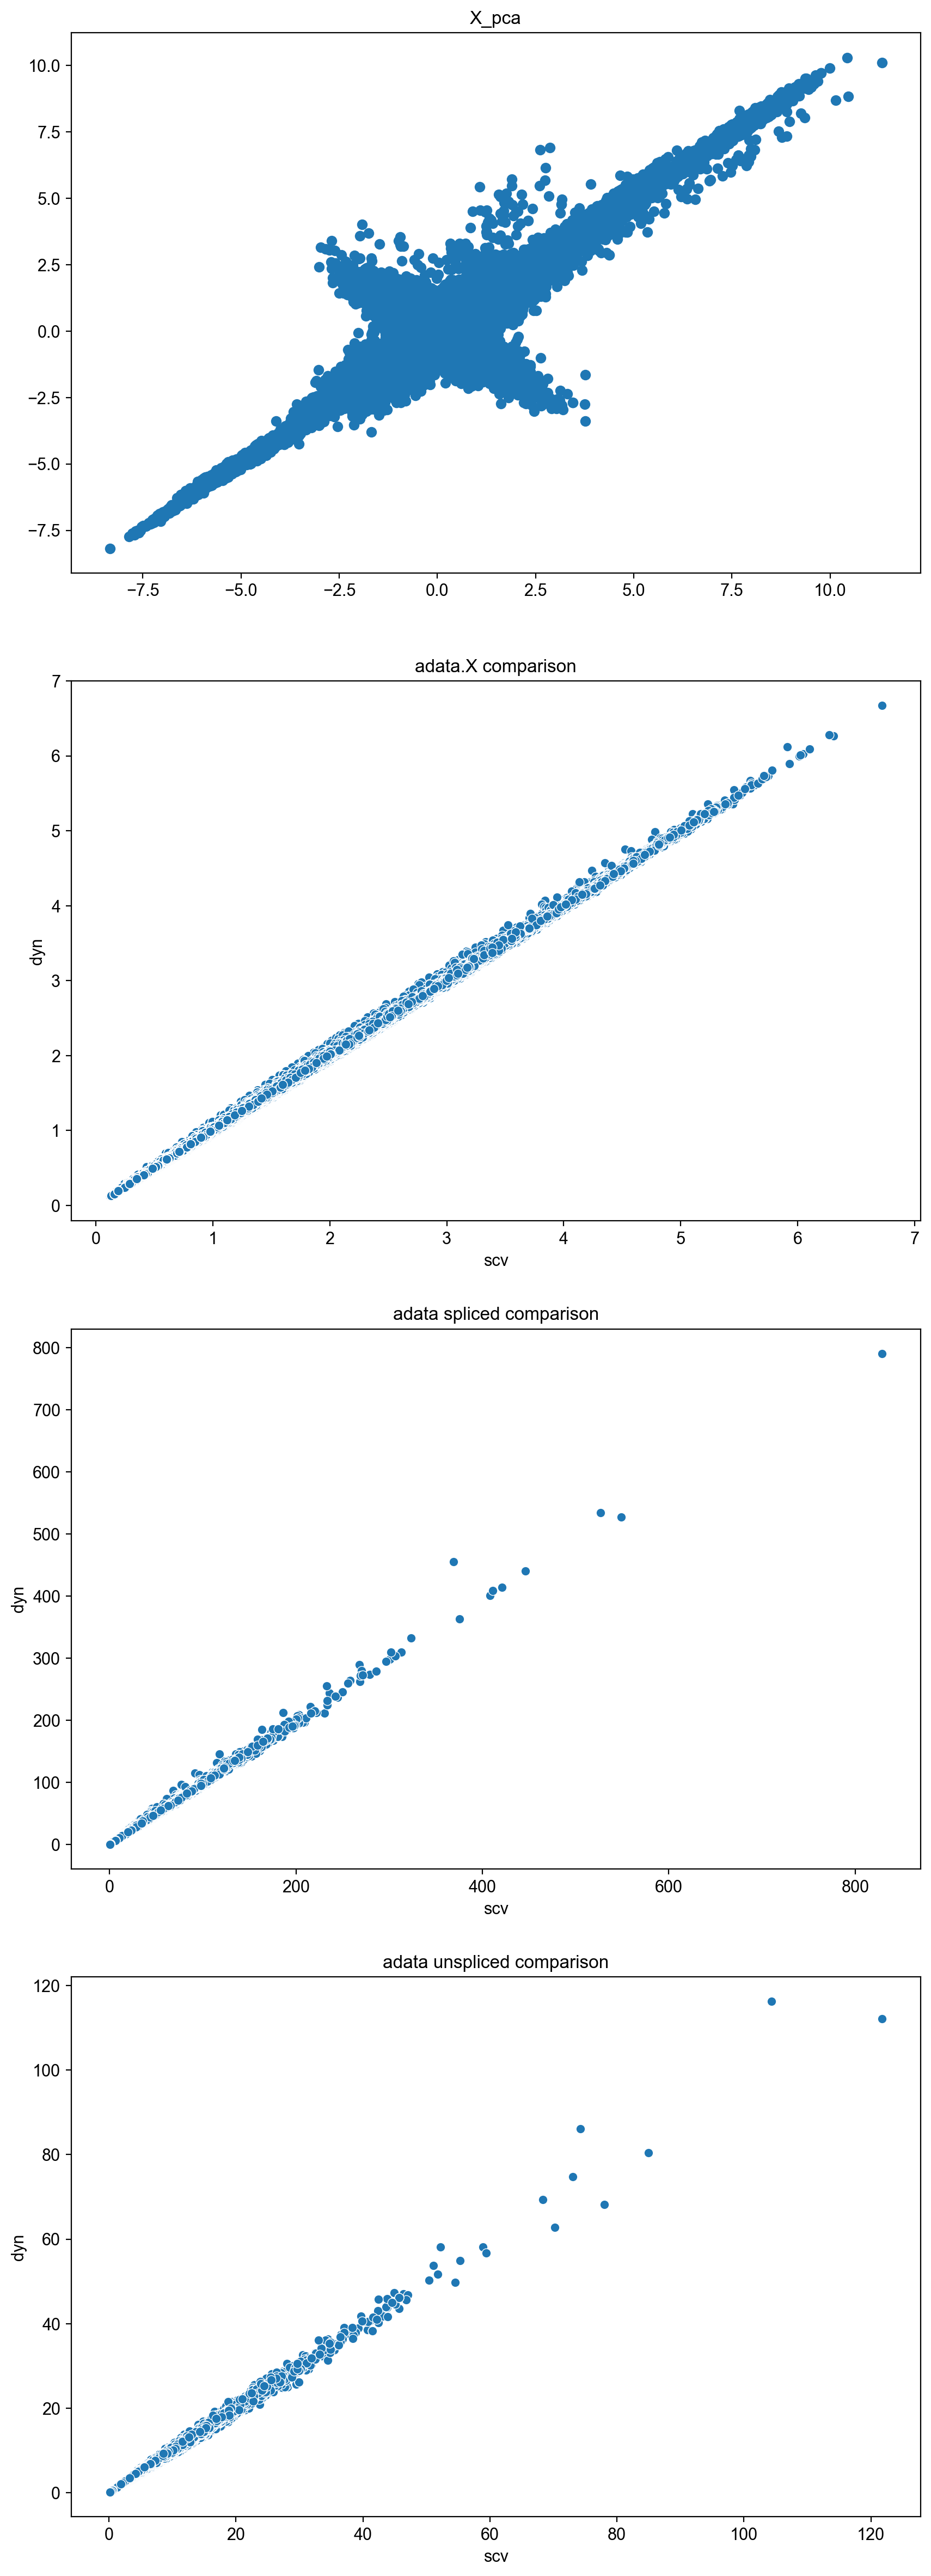

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
fig, axes = plt.subplots(4, figsize=(10, 30))

key = "X_pca"
axes[0].scatter(adata.obsm[key].flatten(), dyn_adata.obsm[key].flatten())#, title="X_pca comparison")
axes[0].set_title(key)
# plot_scatter_sparse(adata.layers["spliced"], dyn_adata.layers["spliced"], ax=axes[1])
# plot_scatter_sparse(adata.layers["unspliced"], dyn_adata.layers["unspliced"], ax=axes[2])
# use_for_pca = dyn_adata.var[DKM.VAR_USE_FOR_PCA]
use_for_pca = list(set(adata.var_names).intersection(dyn_pca_genes))
plot_scatter_sparse(adata[:, use_for_pca].X, dyn_adata[:, use_for_pca].X, ax=axes[1])
axes[1].set_title("adata.X comparison")
axes[1].set_xlabel("scv")
axes[1].set_ylabel("dyn")

plot_scatter_sparse(adata[:, use_for_pca].layers["spliced"], dyn_adata[:, use_for_pca].layers["X_spliced"], ax=axes[2])
axes[2].set_title("adata spliced comparison")
axes[2].set_xlabel("scv")
axes[2].set_ylabel("dyn")
plot_scatter_sparse(adata[:, use_for_pca].layers["unspliced"], dyn_adata[:, use_for_pca].layers["X_unspliced"], ax=axes[3])
axes[3].set_title("adata unspliced comparison")
axes[3].set_xlabel("scv")
axes[3].set_ylabel("dyn")

print("scvelo seurat X_pca stats:")
print(pd.Series(adata.obsm["X_pca"].flatten()).describe())
print("dynamo seurat X_pca stats:")
pd.Series(dyn_adata.obsm["X_pca"].flatten()).describe()

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [8.1545s]


<Figure size 600x400 with 0 Axes>

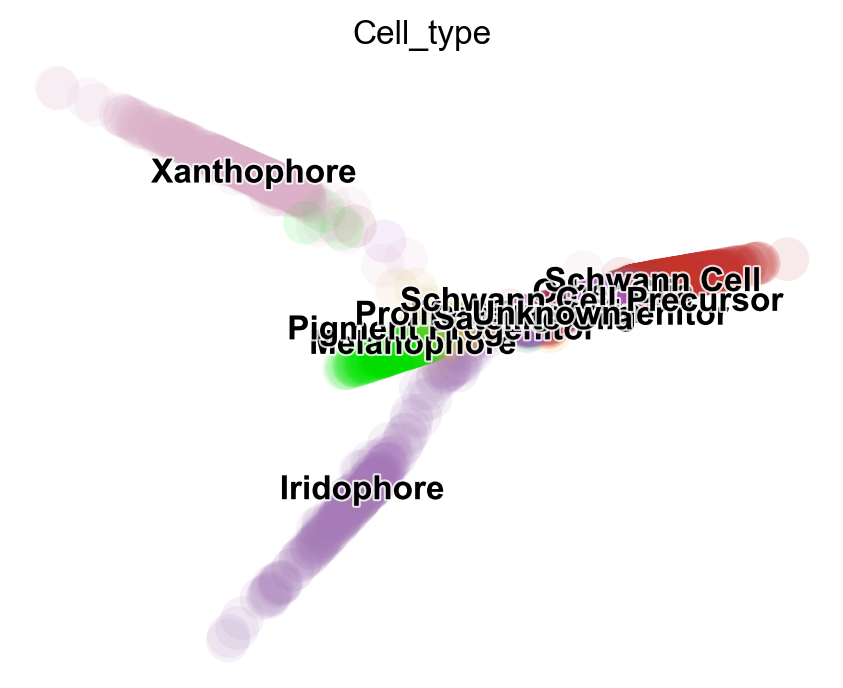

In [24]:
dyn.tl.reduceDimension(dyn_adata)
dyn.pl.umap(dyn_adata, color=celltype_key)

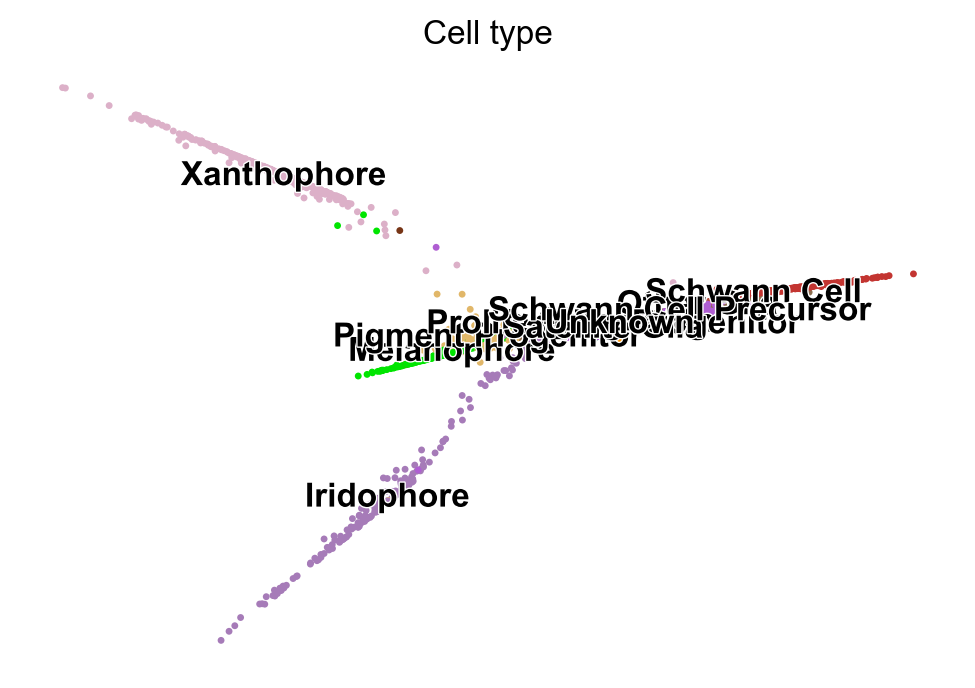

In [27]:
scv.tl.umap(adata)
scv.pl.umap(adata, color=celltype_key)